In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [12]:
scaler = StandardScaler()
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data[continuous_features] = scaler.fit_transform(data[continuous_features])

In [13]:
data = pd.get_dummies(data, columns=['Channel', 'Region'], drop_first=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

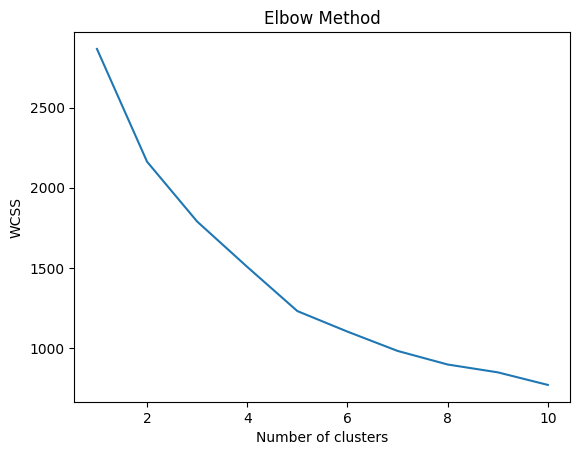

Silhouette Score for K-Means: 0.3970485922904207


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['KMeans_Labels'] = kmeans.fit_predict(data)


silhouette_avg = silhouette_score(data, data['KMeans_Labels'])
print(f'Silhouette Score for K-Means: {silhouette_avg}')

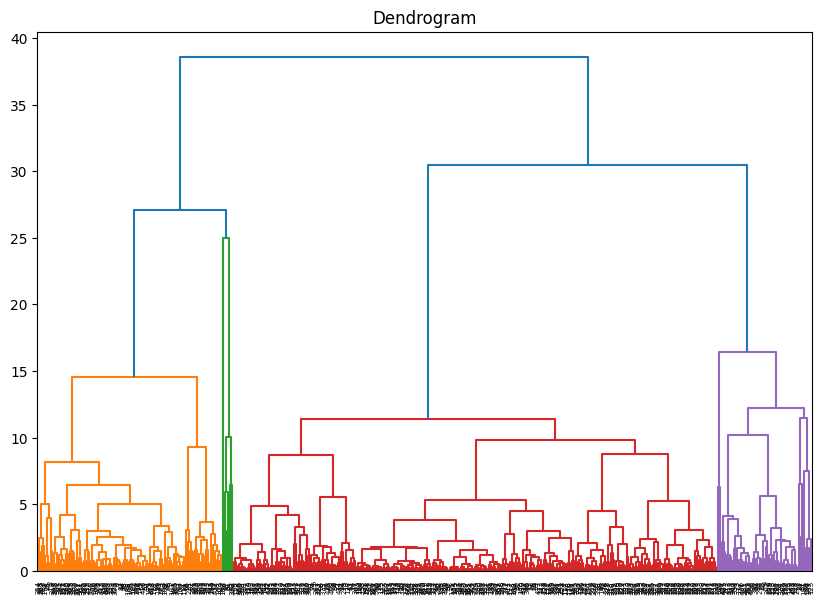

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


linked = linkage(data, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
data['HC_Labels'] = hc.fit_predict(data)

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Labels'] = dbscan.fit_predict(data)


silhouette_avg = silhouette_score(data, data['DBSCAN_Labels'])
print(f'Silhouette Score for DBSCAN: {silhouette_avg}')

Silhouette Score for DBSCAN: 0.08131217358757241


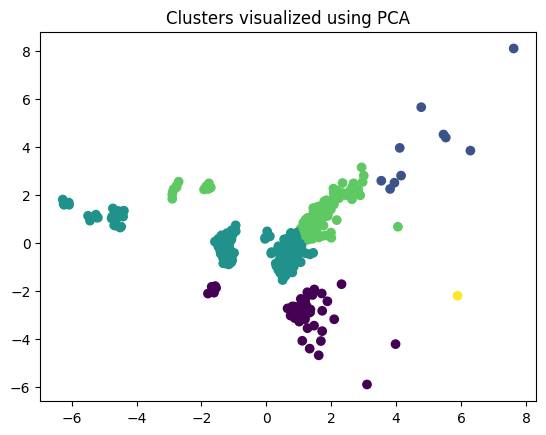

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['KMeans_Labels'])
plt.title('Clusters visualized using PCA')
plt.show()

In [18]:
cluster_profiles = data.groupby('KMeans_Labels').mean()
print(cluster_profiles)

                  Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
KMeans_Labels                                                             
0              1.744928 -0.132048 -0.251753  1.318272         -0.425378   
1              0.313830  3.921906  4.275610 -0.003574          4.618166   
2             -0.196280 -0.391739 -0.451118 -0.150831         -0.420872   
3             -0.414490  0.616498  0.823377 -0.334508          0.819183   
4              1.966817  5.175503  1.287217  6.900600         -0.554862   

               Delicassen  Channel_2  Region_2  Region_3  HC_Labels  \
KMeans_Labels                                                         
0                0.410935   0.094340  0.037736  0.830189   0.000000   
1                0.503365   1.000000  0.100000  0.700000   2.000000   
2               -0.203023   0.089888  0.112360  0.685393   1.992509   
3                0.100143   0.944954  0.128440  0.743119   1.082569   
4               16.478447   0.000000  0.000000  